In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, model_selection
from joblib import dump, load
import lightgbm as lgb
from sklearn.model_selection import train_test_split



pd.set_option('display.max_columns', None)

# Load data

In [2]:
df = pd.read_csv('clean_data1.csv')

df = df.drop("CODE_GENDER_M", axis = 1)

Proportion of accepted and rejected proposal

In [3]:
df["TARGET"].value_counts(normalize=True)*100

0    90.499426
1     9.500574
Name: TARGET, dtype: float64

In [4]:
for col in ["AMT_INCOME_TOTAL", "AMT_ANNUITY", "CREDIT_MEAN_OVERDUE_active", 
 "CREDIT_MEAN_active", "CREDIT_MEAN_OVERDUE_sold", "CREDIT_MEAN_sold",
"CREDIT_MEAN_OVERDUE_closed", "CREDIT_MEAN_closed", "previous_CREDIT"]:
    df[col] = np.log10(df[col]+1)

In [5]:
df.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY,AGE,YEARS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Other,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Other,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,CREDIT_active,CREDIT_MEAN_OVERDUE_active,CREDIT_MEAN_active,proportion_OVERDUE_active,CREDIT_sold,CREDIT_MEAN_OVERDUE_sold,CREDIT_MEAN_sold,proportion_OVERDUE_sold,CREDIT_closed,CREDIT_MEAN_OVERDUE_closed,CREDIT_MEAN_closed,proportion_OVERDUE_closed,CREDIT_bad,CREDIT_MEAN_OVERDUE_bad,CREDIT_MEAN_bad,proportion_OVERDUE_bad,previous_CREDIT,Number_years_Loan_Theorical,AMT_CREDIT_ANNUITY_RATIO
0,100002,1,5.306427,4.392723,25.956104,1.747599,0.0,1.0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.000000,5.653213,0.000000,0.0,0.0,0.0,0.0,1.0,3.320595,4.884310,0.027295,0.0,0.0,0.0,0.0,5.252989,0.121978,16.461104
1,100008,0,4.995640,4.439625,46.477366,4.356653,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0.000000,5.427497,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,5.001823,0.000000,0.0,0.0,0.0,0.0,5.211571,0.277955,17.824857
2,100009,0,5.232999,4.615971,37.799726,8.587106,17.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.000000,5.690357,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,5.060920,0.000000,0.0,0.0,0.0,0.0,4.845957,0.241526,37.789061
3,100014,0,5.051156,4.325885,27.975309,1.862826,0.0,3.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.0,3.804626,5.701461,0.012679,0.0,0.0,0.0,0.0,1.0,3.380656,5.217056,0.014569,0.0,0.0,0.0,0.0,5.012141,0.188240,30.811730
4,100016,0,4.829310,3.769562,36.869684,7.454047,0.0,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.0,0.000000,4.925262,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,4.663479,0.000000,0.0,0.0,0.0,0.0,5.026216,0.087133,13.749044


In [6]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
cat = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE" or column[:4] == "FLAG":
        cat.append(column)
    else:
        col.append(column)

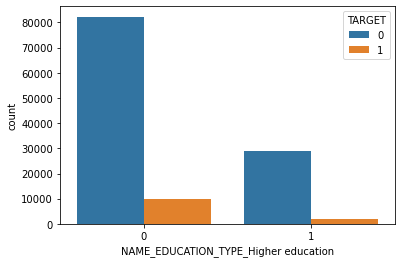

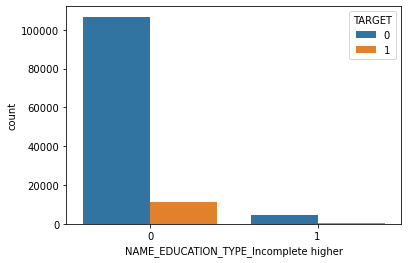

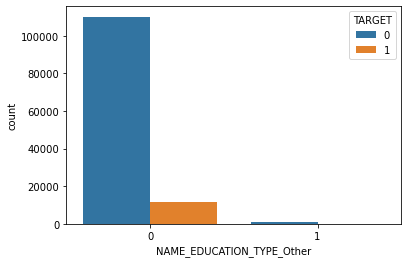

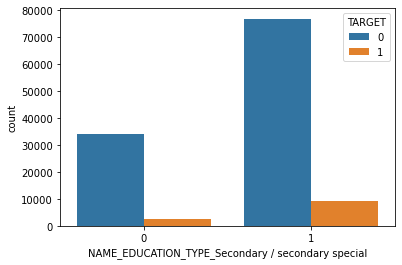

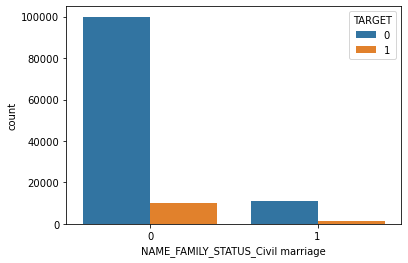

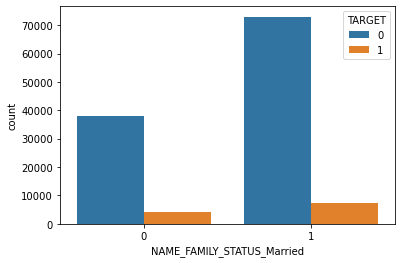

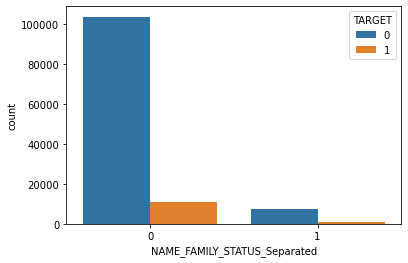

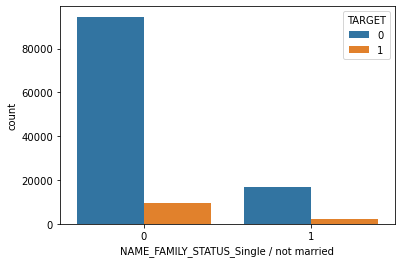

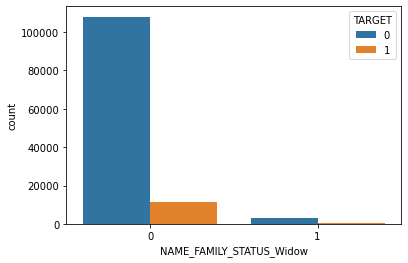

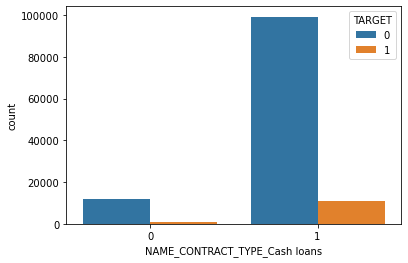

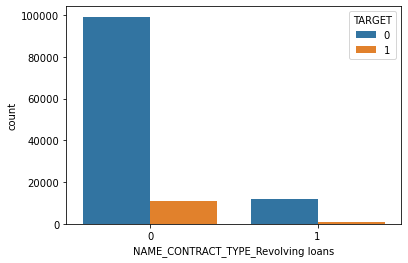

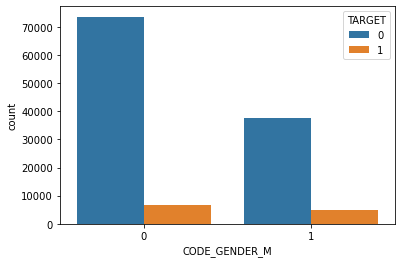

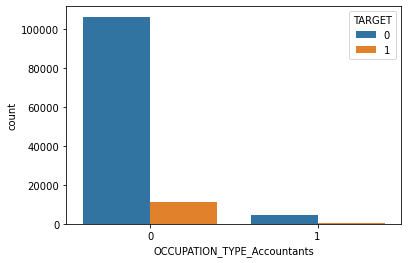

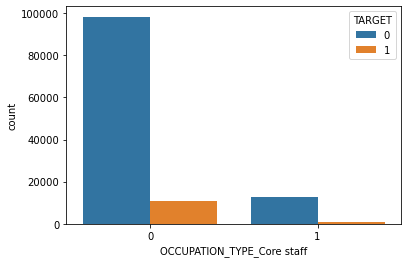

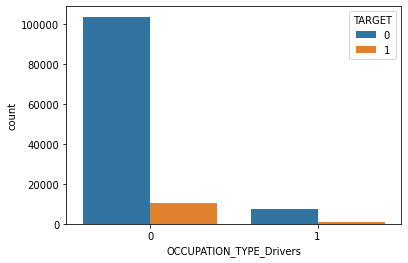

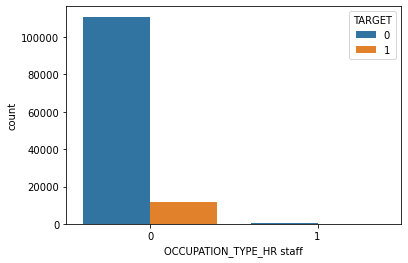

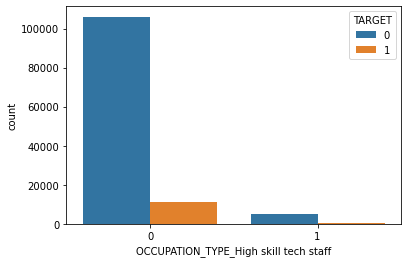

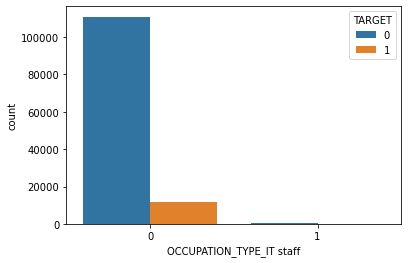

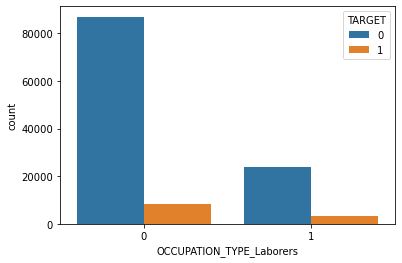

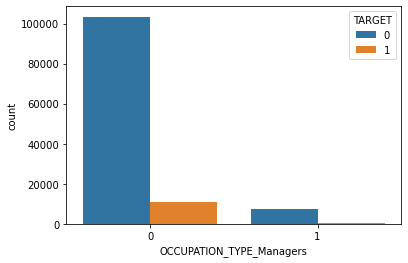

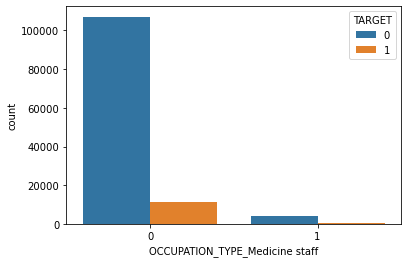

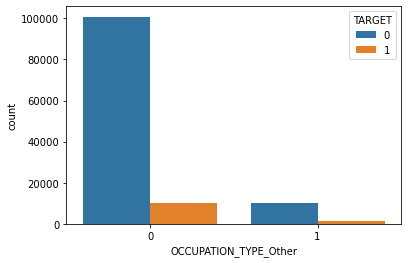

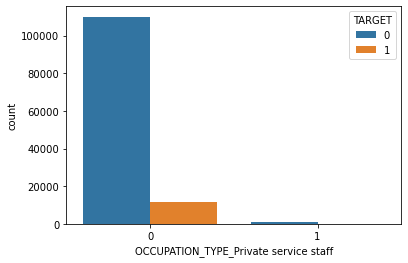

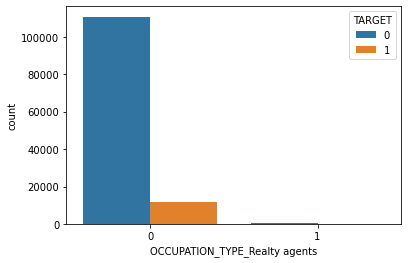

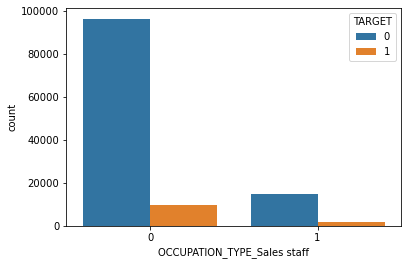

In [7]:
for column in cat:
    sns.countplot(x=column, hue="TARGET", data=df)
    plt.show()

c:\users\jayse\pymol\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


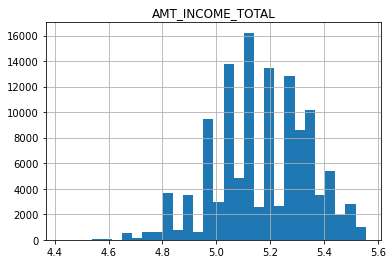

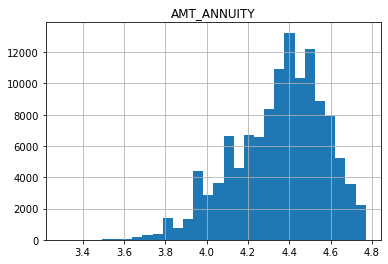

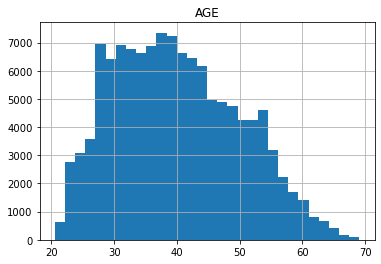

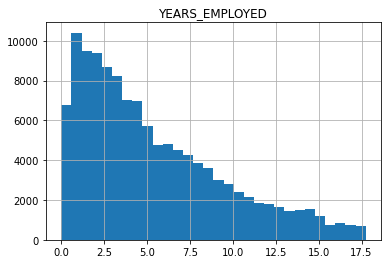

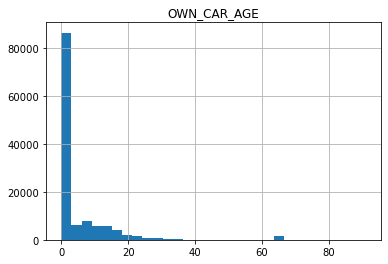

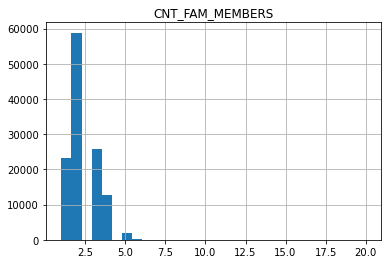

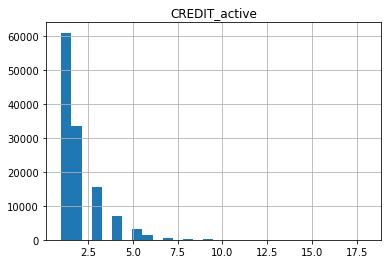

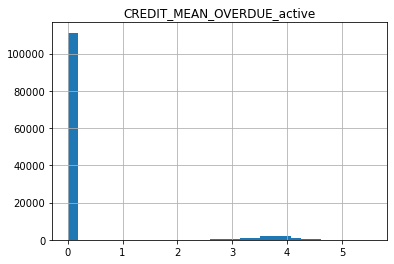

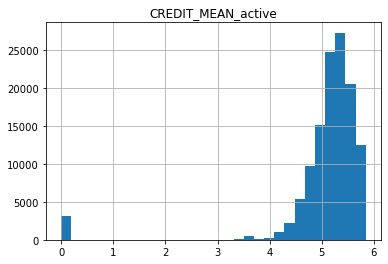

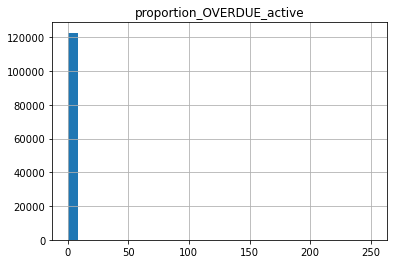

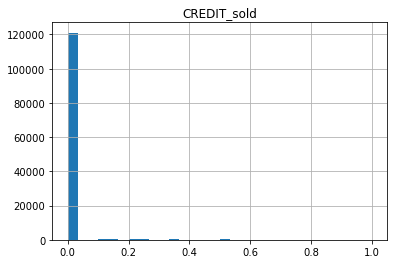

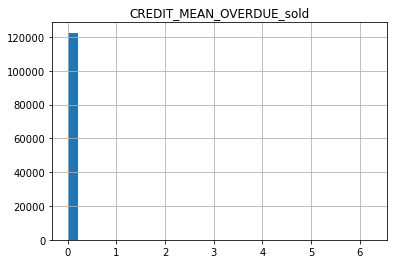

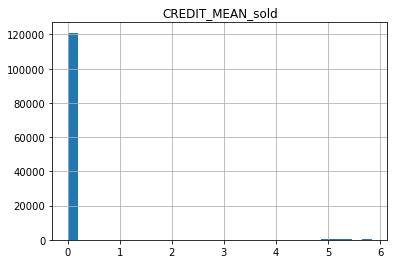

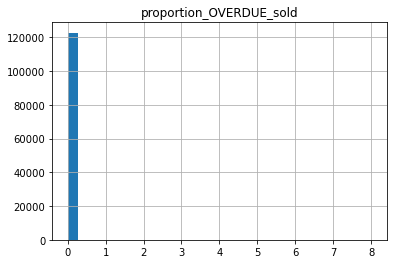

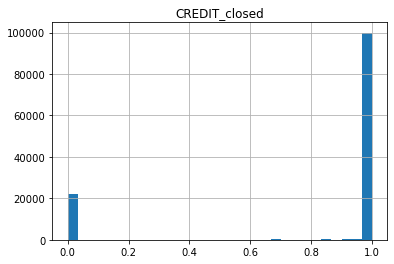

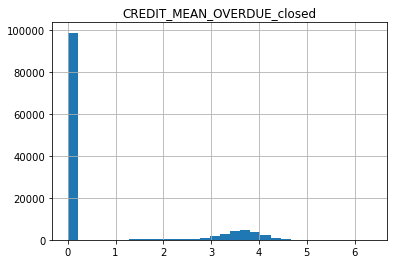

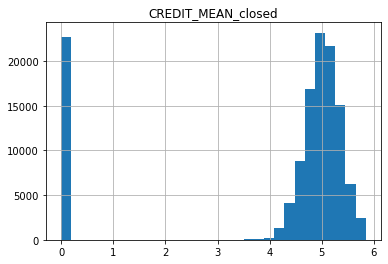

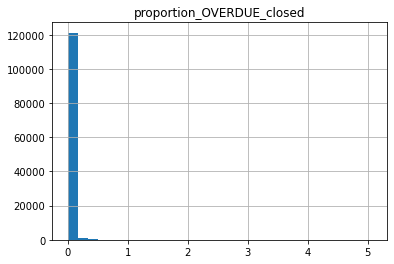

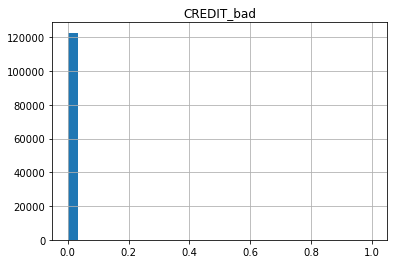

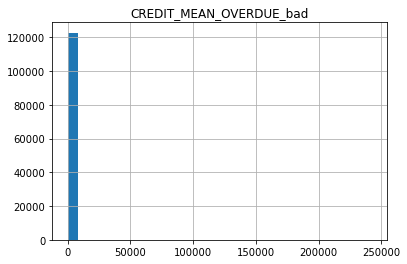

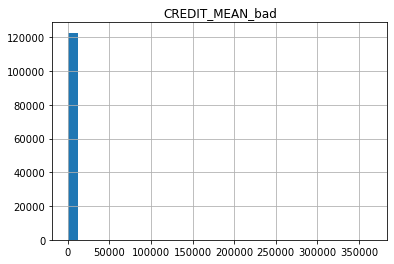

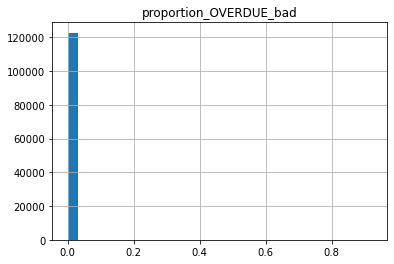

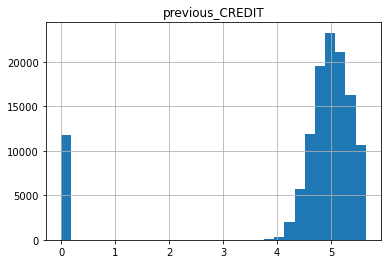

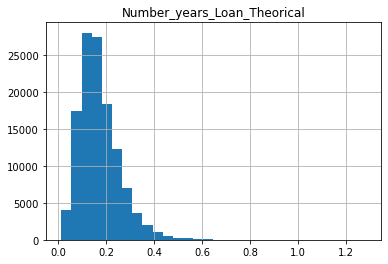

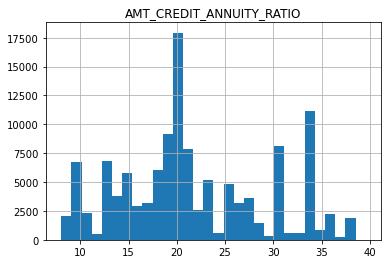

In [8]:
for i in range(len(col)):
    data.hist(col[i], bins = 30)

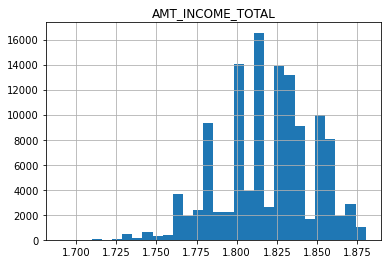

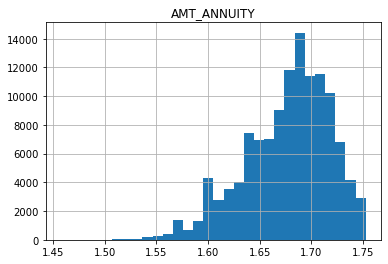

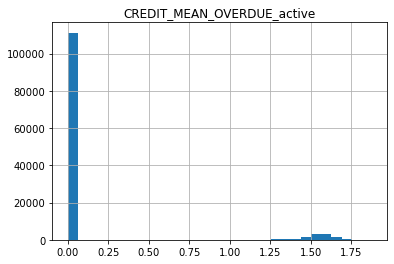

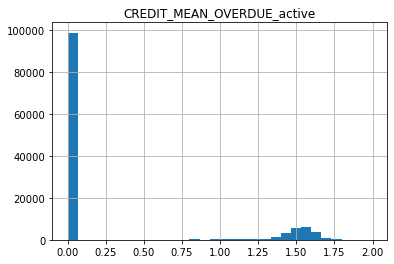

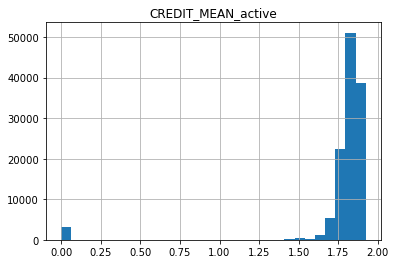

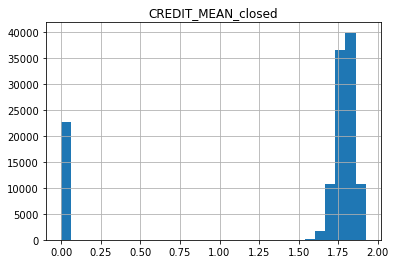

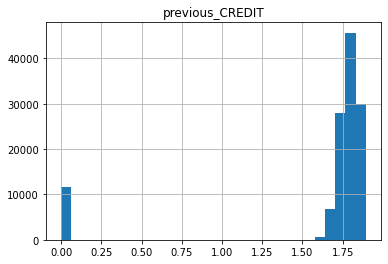

In [9]:
#apply log to flat distribution
np.log(data["AMT_INCOME_TOTAL"]+1).hist(bins = 30)
plt.title("AMT_INCOME_TOTAL")
plt.show()
np.log(data["AMT_ANNUITY"]+1).hist(bins = 30)
plt.title("AMT_ANNUITY")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_OVERDUE_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_OVERDUE_active")
plt.show()
np.log(data["CREDIT_MEAN_active"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_active")
plt.show()
np.log(data["CREDIT_MEAN_closed"]+1).hist(bins = 30)
plt.title("CREDIT_MEAN_closed")
plt.show()
np.log(data["previous_CREDIT"]+1).hist(bins = 30)
plt.title("previous_CREDIT")
plt.show()

# Correlation matrix

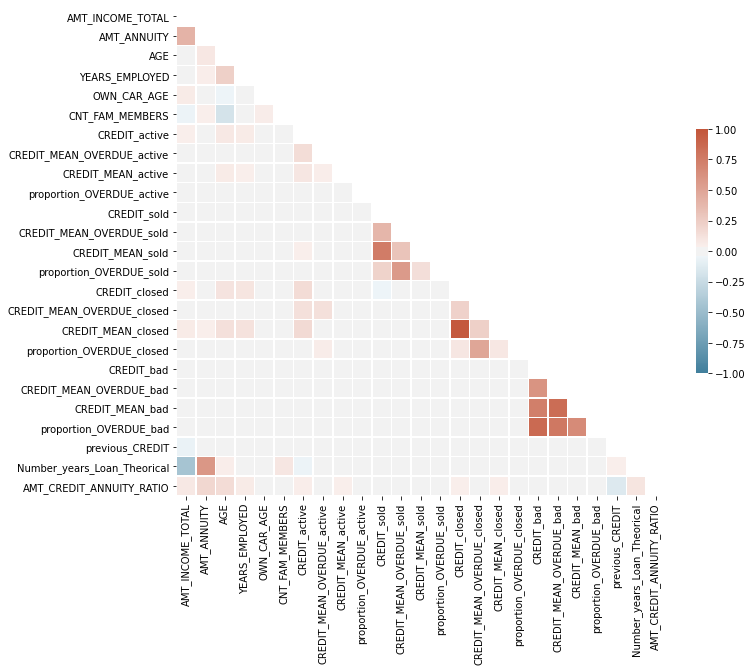

In [10]:
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising

# Candidat's sex

In [11]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.66/0.34'

In [12]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.58/0.42'

To avoid any bias due to candidat's sex, **"CODE_GENDER_M"** is removed.

In [13]:
df = df.drop("CODE_GENDER_M", axis = 1)
target = df[["TARGET"]]
data = df.iloc[:,2:]

# Education type

In [14]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [15]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Higher education                 1898
NAME_EDUCATION_TYPE_Incomplete higher                 454
NAME_EDUCATION_TYPE_Other                             158
NAME_EDUCATION_TYPE_Secondary / secondary special    9153
dtype: int64

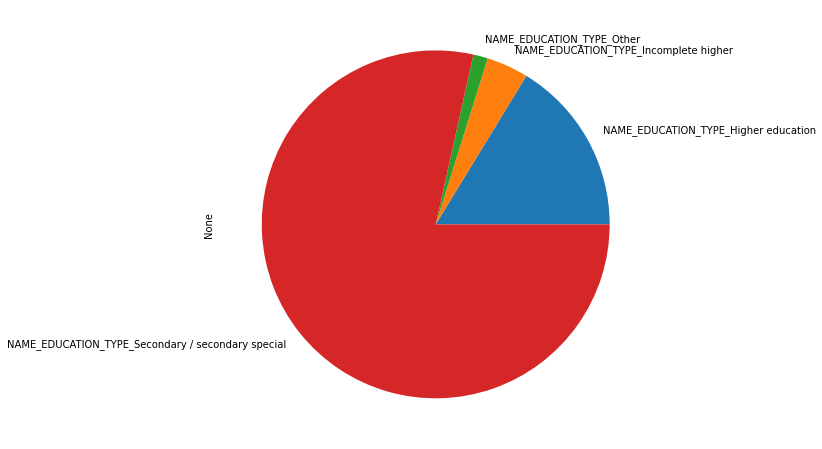

In [16]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [17]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Higher education                 28887
NAME_EDUCATION_TYPE_Incomplete higher                 4372
NAME_EDUCATION_TYPE_Other                             1011
NAME_EDUCATION_TYPE_Secondary / secondary special    76828
dtype: int64

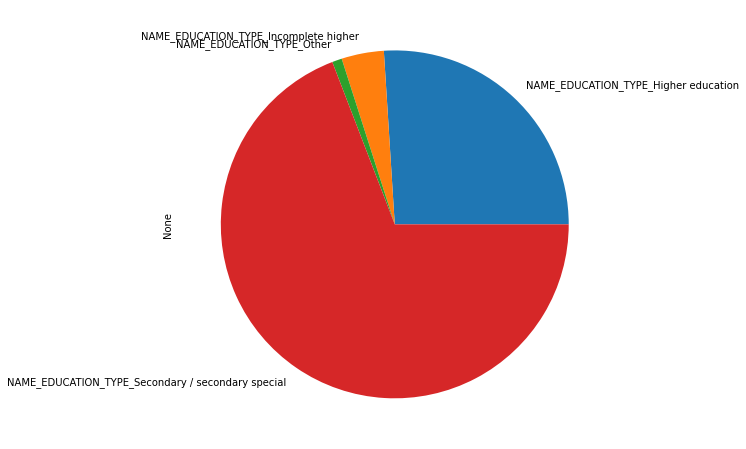

In [18]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [19]:
len("NAME_FAMILY_STATUS")

18

In [20]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [21]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage          1386
NAME_FAMILY_STATUS_Married                 7319
NAME_FAMILY_STATUS_Separated                732
NAME_FAMILY_STATUS_Single / not married    2006
NAME_FAMILY_STATUS_Widow                    220
dtype: int64

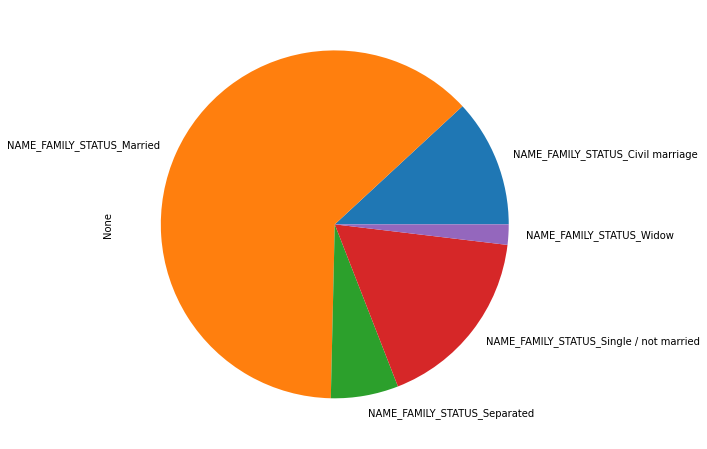

In [22]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [23]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage          11138
NAME_FAMILY_STATUS_Married                 72930
NAME_FAMILY_STATUS_Separated                7304
NAME_FAMILY_STATUS_Single / not married    16607
NAME_FAMILY_STATUS_Widow                    3119
dtype: int64

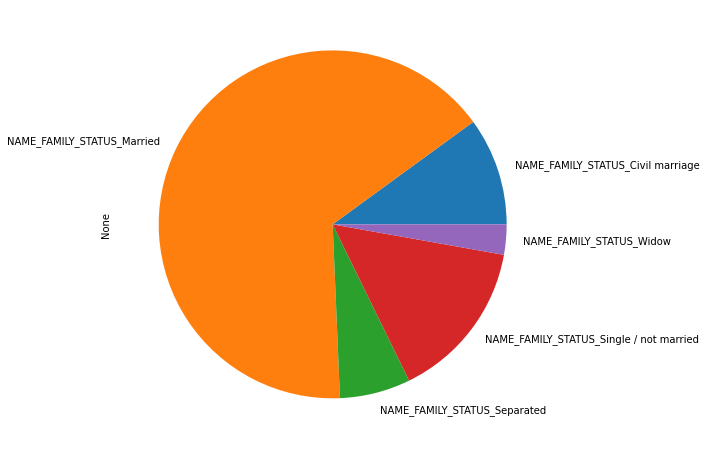

In [24]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Occupation type

In [25]:
len("OCCUPATION_TYPE")

15

In [26]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [27]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               262
OCCUPATION_TYPE_Core staff                987
OCCUPATION_TYPE_Drivers                  1018
OCCUPATION_TYPE_HR staff                   19
OCCUPATION_TYPE_High skill tech staff     372
OCCUPATION_TYPE_IT staff                   16
OCCUPATION_TYPE_Laborers                 3124
OCCUPATION_TYPE_Managers                  558
OCCUPATION_TYPE_Medicine staff            348
OCCUPATION_TYPE_Other                    1316
OCCUPATION_TYPE_Private service staff      78
OCCUPATION_TYPE_Realty agents              27
OCCUPATION_TYPE_Sales staff              1722
dtype: int64

In [28]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               4587
OCCUPATION_TYPE_Core staff               12855
OCCUPATION_TYPE_Drivers                   7399
OCCUPATION_TYPE_HR staff                   251
OCCUPATION_TYPE_High skill tech staff     5084
OCCUPATION_TYPE_IT staff                   219
OCCUPATION_TYPE_Laborers                 24100
OCCUPATION_TYPE_Managers                  7686
OCCUPATION_TYPE_Medicine staff            4058
OCCUPATION_TYPE_Other                    10323
OCCUPATION_TYPE_Private service staff     1120
OCCUPATION_TYPE_Realty agents              337
OCCUPATION_TYPE_Sales staff              14661
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

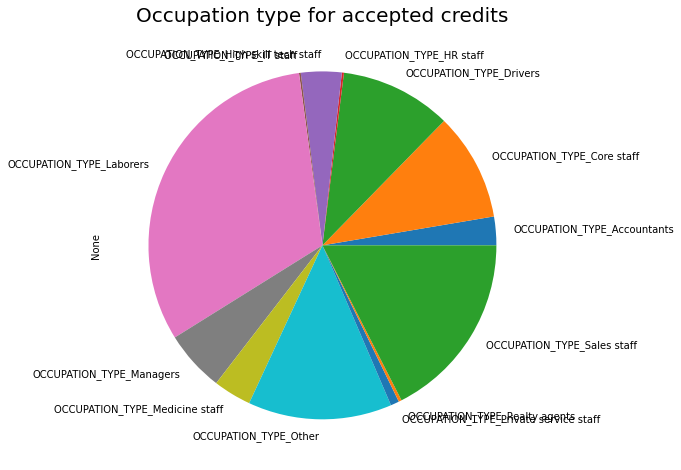

In [29]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

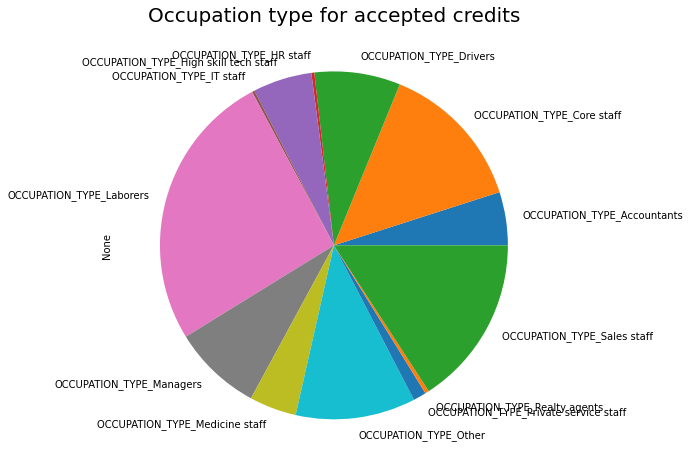

In [30]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Logisitc regression

In [31]:
def score_regression(y_test, y_pred, verbose = True):
    """
    Evaluate prediction by computing sensibility,
    specificity, precision, accurary and F-mesure
    """
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    score = {}
    score["sensibility"] = tp/(tp+fn)
    score["specificity"] = tn/(fp+tn)
    if tp+fp == 0:
        score["precision"] = 0
    else:
        score["precision"] = tp/(tp+fp)
    score["accuracy"] = (tp+tn)/(tn+fn+tp+fp)
    if score["sensibility"] + score["precision"] == 0:
        score["f_mesure"] = 0
    else:
        score["f_mesure"] = 2 * (score["precision"] * score["sensibility"]
        )/(score["sensibility"] + score["precision"])
    if verbose:
        print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
        print("Sensibility (rate of true positif) {0}".format(score["sensibility"]))
        print("Specificity (rate of true negatif) {0:.3f}".format(score["specificity"]))
        if score["precision"] == 0:
            print("Denominator is zero. impossible to compute precision ! Change ratio True and False")
        else:
            print("Precision (proportion of correct prediction of positif) {0:.3f}".format(score["precision"]))
        print("Accurary (proportion of correct prediction) {0:.3f}".format(score["accuracy"]))
        if score["f_mesure"] == 0:
            print("Denominator is zero. impossible to compute F-mesure ! Change ratio True and False\n")
        else:
            print("F-mesure {0:.3f}\n".format(score["f_mesure"]))
    return score

In [32]:
def process_logisitic_reg(X, Y, n_split = 5, display = True):
    """
    Made a logisitic regression return models.
    Display sensibility, specificity and acuracy score
    Arguments:
        _X: numpy array (features)
        _Y: numpy array (label)
    Return:
        mdl: models create
        scores: list of dictionary with sensibility, specificity, precision,
        accurary and F-mesure for each fold.
    """
    #X = data.copy()
    #Y = target.copy()
    #Y.replace({0: False, 1: True}, inplace=True)
    skf = StratifiedKFold(n_splits = n_split, random_state = 42, shuffle = True)
    skf.split(X, Y)
    mdl = []
    scores = []
    for train_index, test_index in skf.split(X, Y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        lr = LogisticRegression(C=10, max_iter = 100000).fit(X_train, np.ravel(y_train))
        y_pred = lr.predict(X_test)
        mdl.append(lr)
        scores.append(score_regression(y_test, y_pred, display))
    return mdl, scores

In [33]:
mdl, scores = process_logisitic_reg(data.copy().to_numpy(), target.copy().to_numpy())

TN: 22219.0, FP: 1.0, FN: 2332.0, TP: 1.0
Sensibility (rate of true positif) 0.0004286326618088298
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.500
Accurary (proportion of correct prediction) 0.905
F-mesure 0.001

TN: 22218.0, FP: 1.0, FN: 2333.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.905
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

TN: 22217.0, FP: 2.0, FN: 2333.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Denominator is zero. impossible to compute precision ! Change ratio True and False
Accurary (proportion of correct prediction) 0.905
Denominator is zero. impossible to compute F-mesure ! Change ratio True and False

TN: 22220.0, FP: 0.0, FN: 2331.0, TP: 1.0
Sensibility (r

## Results

### ROC curve

In [34]:
#take a subset
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
skf.split(X, Y)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]


In [35]:
sensibility = []
for i in range(len(scores)):
    sensibility.append((scores[i]["sensibility"]))
indice = np.where(sensibility == np.max(sensibility))[0][0]
best_mdl = mdl[indice]

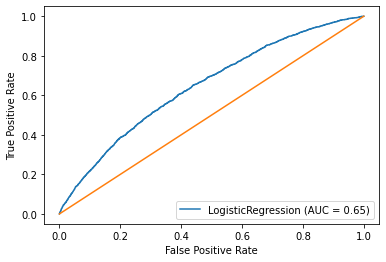

In [36]:
metrics.plot_roc_curve(best_mdl, X_test, y_test)
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()
plt.show()

The logisitic regression model is not effecient to reject bad loan. It can not be used and we must improve it.

In [37]:
tmp = target.sum() / target.shape[0] *100
tmp2 = target.sum() / (target.shape[0]-target.sum()) *100
print("The proportion of True label is {0:.2f}%. It is {1} time less than False.\n\
New datasets are created with less accepted loan.".format(tmp[0], int(tmp2)))

The proportion of True label is 9.50%. It is 10 time less than False.
New datasets are created with less accepted loan.


## New dataset

The number of rejected loan is low compared to accepted loan. Moreover feature are quite equilibrate beetween 2 labels.
True label are increased with data augmentation (adding noises). To be sure there is no overfitting, an unbiased sample will be used. 

In [38]:
def add_noise(X, shape = None, dispersion = 1):
    """
    Generate new samples and add to data given.
    Samples generated follow distribution center to X's mean
    with X's standard deviation
    Arguments:
        _X array
        _Data dimension (which dimension)
        _dispersion: factor to scale standard deviation
    Return
        Array with new data
    """
    std = np.std(X, axis = 0)/dispersion
    means = np.mean(X, axis = 0)
    if shape is None:
        lines = np.shape(X)[0]
        col = np.shape(X)[1]
        Xnoisy =  np.zeros((lines, col))
    else:
        Xnoisy =  np.zeros((shape[0], shape[1]))
    for i in range(np.shape(X)[1]):
        noise = np.random.normal(loc=means[i], scale=std[i], size = np.shape(Xnoisy)[0])
        #convert to int for boolen features
        Xnoisy[:,i] += noise.astype(int)
    return Xnoisy

In [39]:
def best_score_model(mdl, scores, metric = "f_mesure"):
    tmp = []
    for i in range(len(scores)):
        tmp.append(scores[i][metric])
    indice = np.where(tmp == np.max(tmp))[0][0]
    return mdl[i], scores[i]

In [40]:
indices_true = np.where(target == 1)[0]
indices_false = np.arange(0, target.shape[0])
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)

Create a Test validation by taking off 20% of label True and False

In [41]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()

# Training and test dataset

In [42]:
def ratio_false_true(Y, label = 1, ratio = 2):
    """
    For binomila data. Split label 1/0
    and return indice in way that 1/0 has a specific ratio.
    Arguments:
        Y: list of binomial data
        label: label to use (default 1)
        ratio: ratio value between number of 0 and number of 1
        number(0)/number(1)
    Return:
        indices of keep elements
    """
    indice_true = np.where(Y == label)[0]
    indice_false = np.setdiff1d(np.arange(len(Y)), indice_true)
    new_indice_false = np.random.choice(indice_false, int(len(indice_true) * ratio), replace = False)
    indices = np.concatenate([indice_true, new_indice_false])
    return np.sort(indices)

In [43]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

Compare data with no data augmentation vs data augmentation. For both case, ratio **True**/**False** = 2

### No data augmentation

In [44]:
ind = ratio_false_true(Ytrain, label = 1, ratio = 1)
newXtrain = Xtrain[ind]
newYtrain = Ytrain[ind]

In [45]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(newXtrain, newYtrain):
    x_train, x_val = newXtrain[train_index], newXtrain[test_index]
    y_train, y_val = newYtrain[train_index], newYtrain[test_index]
    lr = LogisticRegression(C=10, max_iter = 500000).fit(x_train, np.ravel(y_train))
    y_pred = lr.predict(Xtest)
    mdl.append(lr)
    scores.append(score_regression(Ytest, y_pred, verbose = True))
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")

TN: 19506.0, FP: 13824.0, FN: 1320.0, TP: 2179.0
Sensibility (rate of true positif) 0.6227493569591311
Specificity (rate of true negatif) 0.585
Precision (proportion of correct prediction of positif) 0.136
Accurary (proportion of correct prediction) 0.589
F-mesure 0.223

TN: 19511.0, FP: 13819.0, FN: 1313.0, TP: 2186.0
Sensibility (rate of true positif) 0.6247499285510145
Specificity (rate of true negatif) 0.585
Precision (proportion of correct prediction of positif) 0.137
Accurary (proportion of correct prediction) 0.589
F-mesure 0.224

TN: 19534.0, FP: 13796.0, FN: 1311.0, TP: 2188.0
Sensibility (rate of true positif) 0.6253215204344098
Specificity (rate of true negatif) 0.586
Precision (proportion of correct prediction of positif) 0.137
Accurary (proportion of correct prediction) 0.590
F-mesure 0.225

TN: 19541.0, FP: 13789.0, FN: 1319.0, TP: 2180.0
Sensibility (rate of true positif) 0.6230351529008288
Specificity (rate of true negatif) 0.586
Precision (proportion of correct predict

## lightGBM (Light Gradient Boosting Machine)

In [71]:
%%time
dtrain = lgb.Dataset(data = df.iloc[train_index,2:], label=df.iloc[train_index,1], free_raw_data=False, silent=True)

dvalid = lgb.Dataset(data = df.iloc[test_index,2:], label=df.iloc[test_index,1], free_raw_data=False, silent=True)
Ytest = df.iloc[test_index,1].to_numpy()
params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'nthread': 4,
        'learning_rate': 0.02,  # 02,
        'seed': 42,
        'verbose': -1,
        'metric': 'auc',}

clf = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=500000,
    valid_sets=[dtrain, dvalid],
    early_stopping_rounds=200,
    verbose_eval=False
)
ypred1 = clf.predict(dvalid.data)

Wall time: 21.8 s


In [72]:
np.where(ypred1 > 0.5)

(array([], dtype=int64),)

In [73]:
score_regression(Ytest, np.where(ypred1 > 0.5), verbose = True)

ValueError: Found input variables with inconsistent numbers of samples: [3266, 1]

In [ ]:
gain = clf.feature_importance(importance_type='gain')
for cpt, col in enumerate(df.columns[2:]):
    print(col+" {0:.2f}".format(gain[cpt]))

## LGBMClassifier

In [63]:
%%time 
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',
                            learning_rate=0.02, n_jobs = 4, n_estimators = 1000000)

model.fit(df.iloc[train_index,2:], df.iloc[train_index,1])
ypred_class = model.predict_proba(df.iloc[test_index,2:])


Wall time: 21min 24s


In [64]:
len(np.where(df.iloc[test_index,1] == 1)[0])

317

In [65]:
np.where(ypred_class[:,1] > 0.5)

(array([   1,  166,  374,  575,  751, 1036, 1046, 1284, 1479, 1659, 1738,
        1874, 1892, 2010, 2307, 2318, 2342, 2883, 2920, 3034, 3063, 3202],
       dtype=int64),)

In [74]:
%%time 
model2 = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',
                            learning_rate=0.02, n_jobs = 4, n_estimators = 1000)

model2.fit(df.iloc[train_index,2:], df.iloc[train_index,1])
ypred_class2 = model.predict_proba(df.iloc[test_index,2:])
np.where(ypred_class2[:,1] > 0.5)

Wall time: 4min 3s


(array([  15,   16,   18,   29,   39,   40,   50,   55,   56,   59,   66,
          76,   81,  114,  117,  131,  135,  136,  168,  172,  177,  189,
         190,  198,  203,  208,  210,  230,  235,  245,  249,  274,  276,
         287,  294,  324,  346,  371,  377,  383,  398,  402,  408,  410,
         411,  432,  443,  453,  454,  485,  489,  490,  498,  499,  503,
         524,  527,  534,  539,  548,  552,  561,  577,  580,  591,  597,
         625,  635,  658,  665,  674,  675,  691,  701,  703,  726,  729,
         731,  739,  745,  754,  757,  769,  785,  793,  801,  815,  822,
         823,  848,  853,  867,  874,  875,  878,  884,  888,  893,  941,
         951,  999, 1022, 1032, 1033, 1039, 1042, 1043, 1047, 1055, 1057,
        1075, 1090, 1101, 1112, 1115, 1121, 1134, 1138, 1153, 1158, 1160,
        1161, 1164, 1170, 1172, 1174, 1183, 1189, 1197, 1201, 1230, 1232,
        1236, 1260, 1277, 1284, 1299, 1308, 1321, 1324, 1338, 1347, 1352,
        1355, 1359, 1362, 1371, 1376, 

In [70]:
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(newXtrain, newYtrain):
    x_train, x_val = newXtrain[train_index], newXtrain[test_index]
    y_train, y_val = newYtrain[train_index], newYtrain[test_index]
    
    
    dtrain = lgb.Dataset(data=x_train, label=y_train, 
                                 free_raw_data=False, silent=True)
    dvalid = lgb.Dataset(data=x_val, label=y_val, 
                         free_raw_data=False, silent=True)
    params = {
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'nthread': 4,
        'learning_rate': 0.02,  # 02,
        'num_leaves': 20,
        'colsample_bytree': 0.9497036,
        'subsample': 0.8715623,
        'subsample_freq': 1,
        'max_depth': 8,
        'reg_alpha': 0.041545473,
        'reg_lambda': 0.0735294,
        'min_split_gain': 0.0222415,
        'min_child_weight': 60, # 39.3259775,
        'seed': 0,
        'verbose': -1,
        'metric': 'auc',
    }

    clf = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=10000,
        valid_sets=[dtrain, dvalid],
        early_stopping_rounds=200,
        verbose_eval=False
    )
    clf_pred = clf.predict(dvalid)
#    y_pred = lr.predict(Xtest)
#    mdl.append(lr)
#    scores.append(score_regression(Ytest, y_pred, verbose = True))
#best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")

c:\users\jayse\pymol\lib\site-packages\lightgbm\basic.py:154: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


TypeError: Cannot use Dataset instance for prediction, please use raw data instead

In [ ]:
y_val

In [ ]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
indices_true = np.where(target == 1)[0]
indices_false = np.arange(0, target.shape[0])
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)
########## Test set ############
#Label True 
ind_true_Test = np.random.choice(indices_true, int(len(indices_true)*0.2), replace = False)
#Label False
ind_False_Test = np.random.choice(indices_false, int(len(indices_false)*0.2), replace = False)
ind_Test = np.concatenate([ind_true_Test, ind_False_Test])
np.random.shuffle(ind_Test)
X_test = X[ind_Test]
Y_test = Y[ind_Test]
########## Train set ############
#indice use for cross validation
ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
ind_Train = np.concatenate([ ind_true_CV, ind_false_CV ] )
np.random.shuffle(ind_Train)
X_train = X[ind_Train]
Y_train = Y[ind_Train]

### Data augmentation

In [ ]:
X_noisy = None
Y_noisy = None
#data noisy with True label
Xnoisy_True = add_noise(X[ind_true_CV], dispersion = 1)
#Concatenate data noisy with no noisy True label
Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])
#Add data with False label
X_noisy = np.concatenate([ Xnoisy_True, X[ ind_false_CV[0 : len(Xnoisy_True) * 2] ] ])
Ynoisy_False = np.repeat([False], len(Xnoisy_True) * 2)
Y_noisy = np.concatenate([Ynoisy_True, Ynoisy_False])
#Shuffle indice to randomize partition
ind = np.arange(len(X_noisy))
np.random.shuffle(ind)
X_noisy = X_noisy[ind]
Y_noisy = Y_noisy[ind]

In [ ]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(X_noisy, Y_noisy):
    X_train, X_val = X_noisy[train_index], X_noisy[test_index]
    y_train, y_val = Y_noisy[train_index], Y_noisy[test_index]
    lr = LogisticRegression(C=10, max_iter = 100000).fit(X_train, np.ravel(y_train))
    y_pred = lr.predict(X_val)
    mdl.append(lr)
    scores.append(score_regression(y_val, y_pred, verbose = False))
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")
y_pred2 = best_mdl.predict(X_test)
score_regression(Y_test, y_pred2)

In [ ]:
#export model
dump(best_mdl, 'logisitc_model1.joblib')

### Data augmentation with ratio **True**/**False** = 4

In [ ]:
X_noisy = None
Y_noisy = None
#data noisy with True label
Xnoisy_True = add_noise(X[ind_true_CV], dispersion = 1)
#Concatenate data noisy with no noisy True label
Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])
#Add data with False label
X_noisy = np.concatenate([ Xnoisy_True, X[ ind_false_CV[0 : len(Xnoisy_True) * 4] ] ])
Ynoisy_False = np.repeat([False], len(Xnoisy_True) * 4)
Y_noisy = np.concatenate([Ynoisy_True, Ynoisy_False])
#Shuffle indice to randomize partition
ind = np.arange(len(X_noisy))
np.random.shuffle(ind)
X_noisy = X_noisy[ind]
Y_noisy = Y_noisy[ind]

In [ ]:
%%time
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
mdl = []
scores = []
for train_index, test_index in skf.split(X_noisy, Y_noisy):
    X_train, X_val = X_noisy[train_index], X_noisy[test_index]
    y_train, y_val = Y_noisy[train_index], Y_noisy[test_index]
    lr = LogisticRegression(C=10, max_iter = 100000).fit(X_train, np.ravel(y_train))
    y_pred = lr.predict(X_val)
    mdl.append(lr)
    scores.append(score_regression(y_val, y_pred))
print("Test sample result:")
best_mdl, score = best_score_model(mdl, scores, metric = "f_mesure")
y_pred2 = best_mdl.predict(X_test)
score_regression(Y_test, y_pred2)

# ROC curve

In [ ]:
metrics.plot_roc_curve(best_mdl, X_test, np.ravel(Y_test))
plt.plot([0, 1], [0, 1], label = "baseline")
plt.show()
plt.show()

# Random forest

We will try to rationalize model by keeping most important features

In [ ]:
%%time
def process_random_forest(X, Y, n_split = 5):
    mdl_clf = []
    skf = StratifiedKFold(n_splits = n_split, random_state = 42, shuffle = True)
    for train_index, test_index in skf.split(X, Y):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = Y[train_index], Y[test_index]
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, np.ravel(y_train))
        y_pred = clf.predict(X_val)
        mdl_clf.append(clf)
        F_mesure = score_regression(y_val, y_pred, verbose =False)
    return mdl_clf

In [ ]:
%%time
#indice use for cross validation
step = 2
dispersion = 1
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
#ind_Test = np.concatenate([ind_true_CV, ind_false_CV])

Xnoisy_True = add_noise(X[ind_true_CV], dispersion = dispersion)
Xnoisy_True = np.concatenate([X[ind_true_CV], Xnoisy_True])
Ynoisy_True = np.repeat([True], np.shape(Xnoisy_True)[0])

nb_true = np.shape(X[ind_true_CV])[0]
nb_false = np.shape(X[ind_false_CV])[0]
scores = []
for i in range(0, int(nb_false / nb_true /step)):
    tmp = X[ind_false_CV][int(i*step*nb_true) : int((i+1)*step*nb_true)]
    X_Train = np.concatenate([Xnoisy_True, tmp])
    Y_Train = np.concatenate([Ynoisy_True, np.repeat([False], len(tmp))])
    clf = process_random_forest(X_Train, Y_Train)

score_regression(clf[-1].predict(X_test), np.ravel(Y_test), verbose = True)['f_mesure']

In [ ]:
#export model
dump(best_mdl, 'random_forest_model.joblib')

## lightGBM (Light Gradient Boosting Machine)

In [ ]:
X = data.copy().to_numpy()
Y = target.copy().to_numpy()
indices_true = np.where(target == 1)[0]
indices_false = np.arange(0, target.shape[0])
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)
########## Test set ############
#Label True 
ind_true_Test = np.random.choice(indices_true, int(len(indices_true)*0.2), replace = False)
#Label False
ind_False_Test = np.random.choice(indices_false, int(len(indices_false)*0.2), replace = False)
ind_Test = np.concatenate([ind_true_Test, ind_False_Test])
np.random.shuffle(ind_Test)
X_test = X[ind_Test]
Y_test = Y[ind_Test]
########## Train set ############
#indice use for cross validation
ind_true_CV = np.setdiff1d(indices_true, ind_true_Test)
ind_false_CV = np.setdiff1d(indices_false, ind_False_Test)
ind_Train = np.concatenate([ ind_true_CV, ind_false_CV ] )
np.random.shuffle(ind_Train)
X_train = X[ind_Train]
Y_train = Y[ind_Train]

In [ ]:
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1, n_estimators=500,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)

In [ ]:
model.fit(X_train, np.ravel(Y_train))
y_pred = model.predict(X_test)
score_regression(Y_test, y_pred, verbose =False)

In [ ]:
len(y_pred)

We use attibute **feature_importances_** to select features that contribute the most to prediction. 

## New logistic regression model

In [ ]:
data[features]

## Test set

In [ ]:
X = data[features].copy().to_numpy()
Y = df["TARGET"].copy().to_numpy()

In [ ]:
indices_true = np.where(target == 1)[0]
indices_false = np.arange(0, target.shape[0])
indices_false = np.setdiff1d(indices_false, indices_true)
#shuffle indice
np.random.shuffle(indices_true)
np.random.shuffle(indices_false)

#Label True 
ind_true_Test = np.random.choice(indices_true, int(len(indices_true)*0.2), replace = False)
#Label False
ind_False_Test = np.random.choice(indices_false, int(len(indices_false)*0.2), replace = False)
ind_Test = np.concatenate([ind_true_Test, ind_False_Test])
X_test = X[ind_Test]
Y_test = Y[ind_Test]

## Training set

Example of adding noises with specific parameters